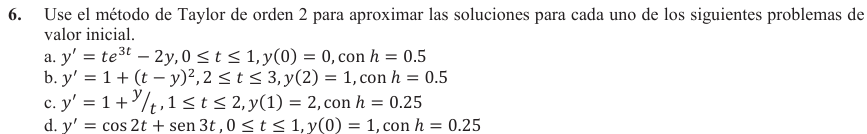

In [1]:
import numpy as np
import pandas as pd

# Método de Taylor de orden 2
def taylor_orden_2(f, df_dt, df_dy, t0, y0, h, t_end):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    steps = int((t_end - t0) / h)
    for _ in range(steps):
        f_val = f(t, y)
        df_val = df_dt(t, y) + df_dy(t, y) * f_val
        y = y + h * f_val + (h**2 / 2) * df_val
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return pd.DataFrame({"t": t_values, "y_aprox": y_values})

# a. y' = t * e^(3t) - 2y
f_a     = lambda t, y: t * np.exp(3 * t) - 2 * y
dfdt_a  = lambda t, y: (1 + 3 * t) * np.exp(3 * t)
dfdy_a  = lambda t, y: -2
df_a = taylor_orden_2(f_a, dfdt_a, dfdy_a, t0=0, y0=0, h=0.5, t_end=1)

# b. y' = 1 + (t - y)^2
f_b     = lambda t, y: 1 + (t - y)**2
dfdt_b  = lambda t, y: 2 * (t - y)
dfdy_b  = lambda t, y: -2 * (t - y)
df_b = taylor_orden_2(f_b, dfdt_b, dfdy_b, t0=2, y0=1, h=0.5, t_end=3)

# c. y' = 1 + y / t
f_c     = lambda t, y: 1 + y / t
dfdt_c  = lambda t, y: -y / (t**2)
dfdy_c  = lambda t, y: 1 / t
df_c = taylor_orden_2(f_c, dfdt_c, dfdy_c, t0=1, y0=2, h=0.25, t_end=2)

# d. y' = cos(2t) + sin(3t)
f_d     = lambda t, y: np.cos(2 * t) + np.sin(3 * t)
dfdt_d  = lambda t, y: -2 * np.sin(2 * t) + 3 * np.cos(3 * t)
dfdy_d  = lambda t, y: 0
df_d = taylor_orden_2(f_d, dfdt_d, dfdy_d, t0=0, y0=1, h=0.25, t_end=1)

# Mostrar resultados
print("\nResultados Método de Taylor Orden 2:")
for letra, df in zip("abcd", [df_a, df_b, df_c, df_d]):
    print(f"\nInciso {letra}:")
    print(df)



Resultados Método de Taylor Orden 2:

Inciso a:
     t   y_aprox
0  0.0  0.000000
1  0.5  0.125000
2  1.0  2.023239

Inciso b:
     t   y_aprox
0  2.0  1.000000
1  2.5  1.750000
2  3.0  2.425781

Inciso c:
      t   y_aprox
0  1.00  2.000000
1  1.25  2.781250
2  1.50  3.612500
3  1.75  4.485417
4  2.00  5.394048

Inciso d:
      t   y_aprox
0  0.00  1.000000
1  0.25  1.343750
2  0.50  1.772187
3  0.75  2.110676
4  1.00  2.201644
